
# 통계 기반의 그래프

`seaborn` 라이브러리가 매력적인 이유는 바로 **통계 차트** 입니다.

이번 실습에서는 `seaborn`의 다양한 통계 차트 중 대표적인 차트 몇 개를 뽑아서 다뤄볼 예정입니다.

더 많은 통계 차트를 경험해보고 싶으신 분은 [공식 도큐먼트](https://seaborn.pydata.org/api.html)에서 확인하실 수 있습니다.

## 모듈 Import

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 스타일 설정
sns.set_style('white')

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
# 엘리스 환경에서 한글 폰트를 사용하기 위한 코드입니다.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic') 

### 샘플 데이터셋 로드

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

In [4]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


* total_bill: 총 합계 요금표
* tip: 팁
* sex: 성별
* smoker: 흡연자 여부
* day: 요일
* time: 식사 시간
* size: 식사 인원

## Countplot

항목별 갯수를 세어주는 `countplot` 입니다.

알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줍니다.

[countplot 공식 도큐먼트](https://seaborn.pydata.org/generated/seaborn.countplot.html)

### 세로로 그리기

<AxesSubplot: xlabel='class', ylabel='count'>

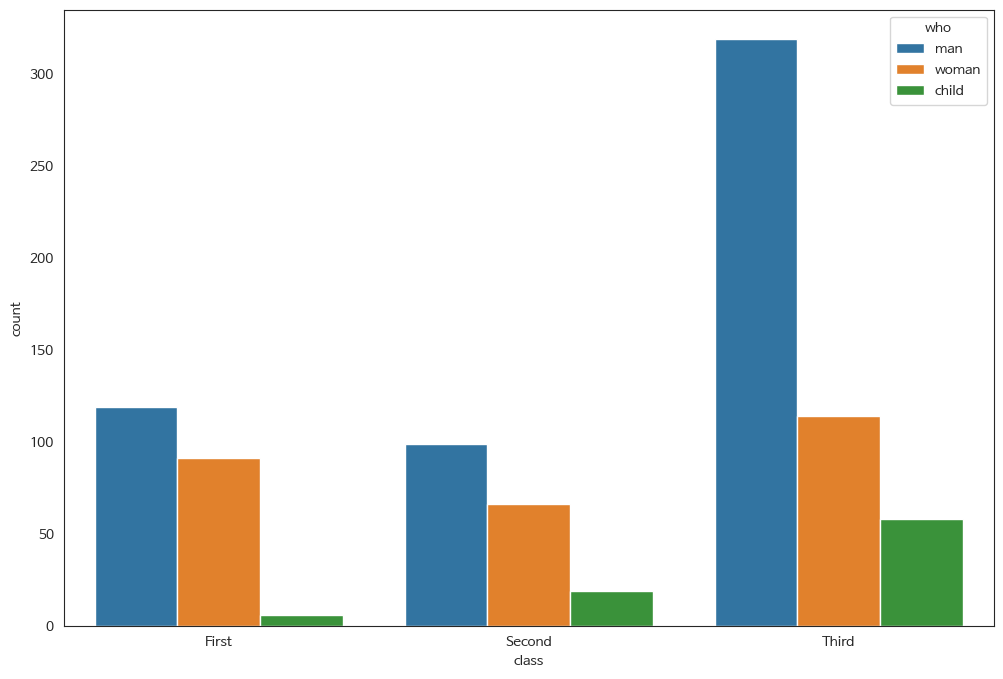

In [5]:
sns.countplot(x="class", hue="who", data=titanic) # y에 뭘 안넣어도 알아서 count를 세준다.

### 가로로 그리기

<AxesSubplot: xlabel='count', ylabel='class'>

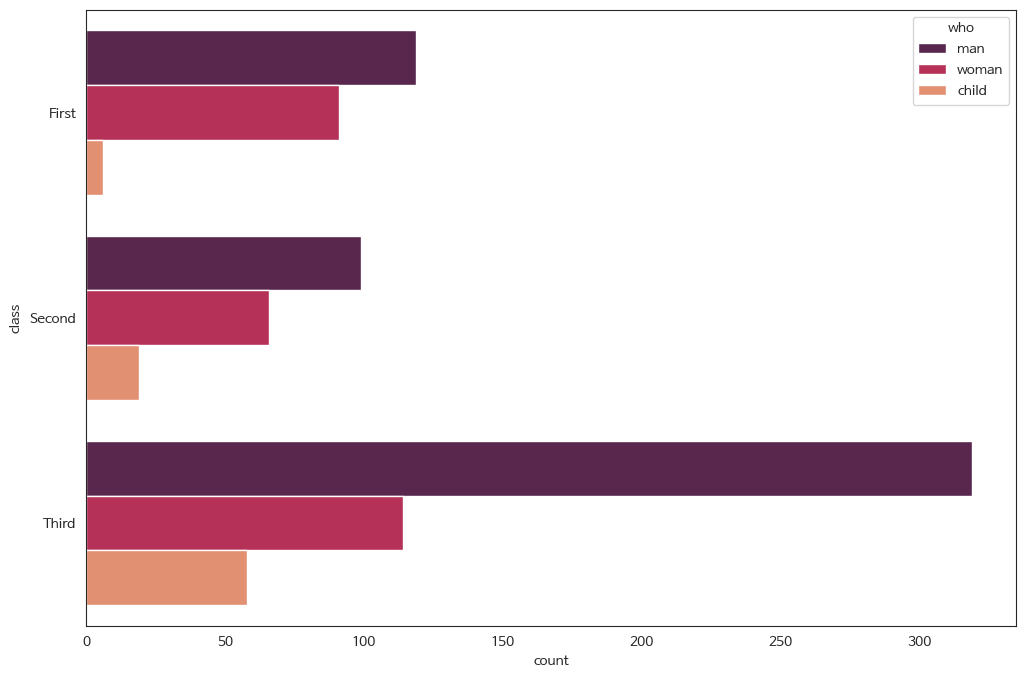

In [6]:
# y에 class를 넣음
sns.countplot(y="class", hue="who", data=titanic, palette='rocket')

## kdeplot

`kde`는 histogram보다 **부드러운 형태의 분포 곡선**을 보여주는 방법

In [7]:
# 샘플데이터 생성
x = np.random.randn(100)

<AxesSubplot: ylabel='Density'>

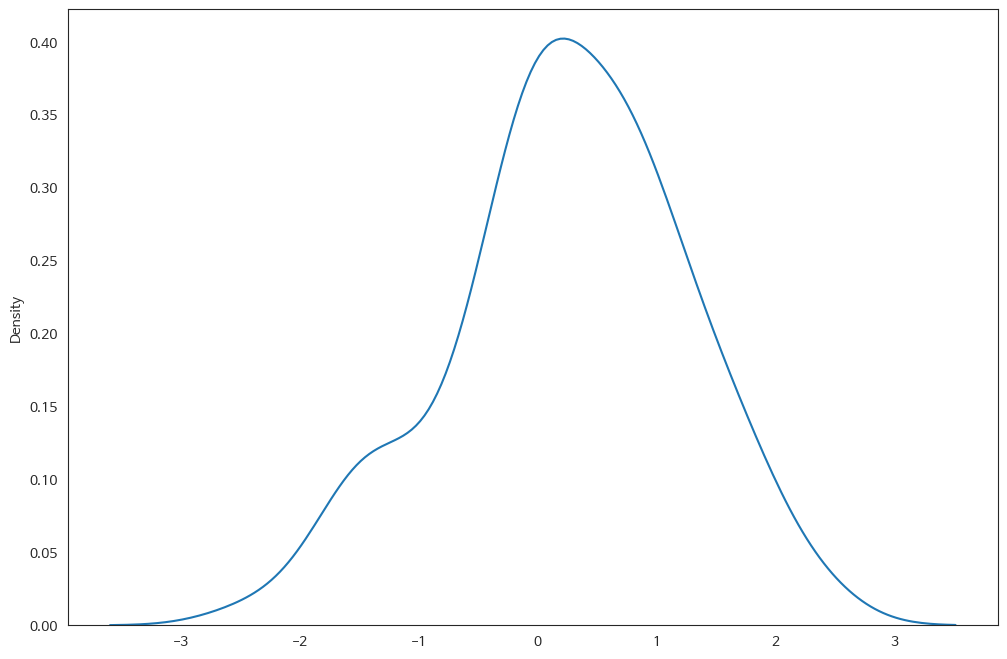

In [8]:
sns.kdeplot(x=x)

## rugplot

`rugplot`의 `rug`는 데이터 위치를 x축 위에 **작은 선분(rug)으로 나타내어 데이터들의 위치 및 분포**를 보여준다.

실제 데이터가 어디 있는지 모르는 kdeplot의 단점 극복

<AxesSubplot: ylabel='Density'>

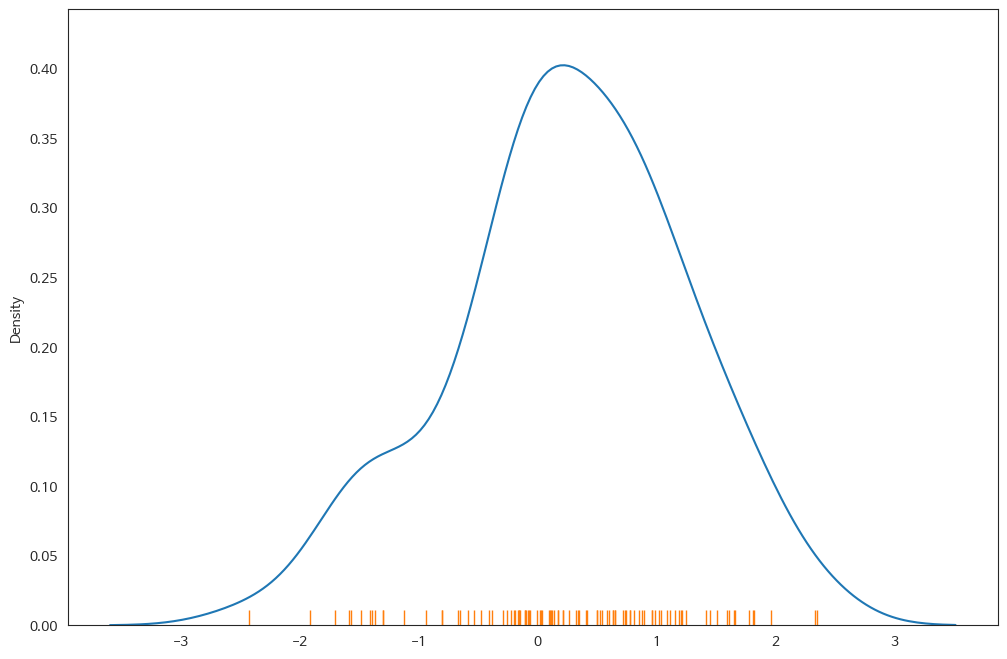

In [9]:
sns.kdeplot(x=x)
sns.rugplot(x=x)

## heatmap

색상으로 표현할 수 있는 다양한 정보를 **일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽**으로
출력하는 것이 특징이다

[heatmap 도큐먼트](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

### correlation(상관관계)를 시각화

**corr()** 함수는 데이터의 상관관계를 보여줍니다.

In [10]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


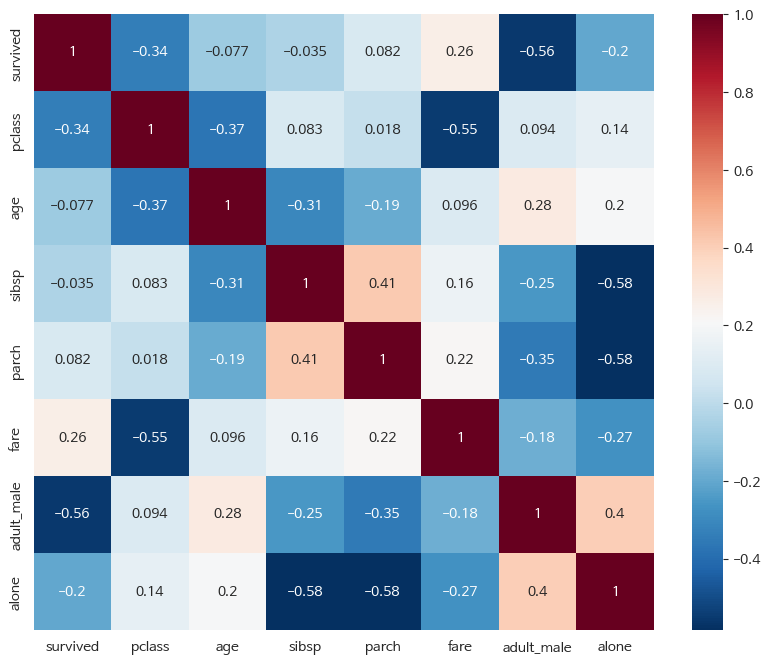

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap="RdBu_r") # annot: 1, -0.34처럼 박스 안에 숫자값 표현하기 위해
plt.show()

In [14]:
# 피벗테이블도 히트맵으로 그려볼 수 있다
a = titanic.pivot_table(index='pclass', columns='who', values='survived')
a

who,child,man,woman
pclass,,,
1,0.833333,0.352941,0.978022
2,1.000000,0.080808,0.909091
3,0.431034,0.119122,0.491228


<AxesSubplot: xlabel='who', ylabel='pclass'>

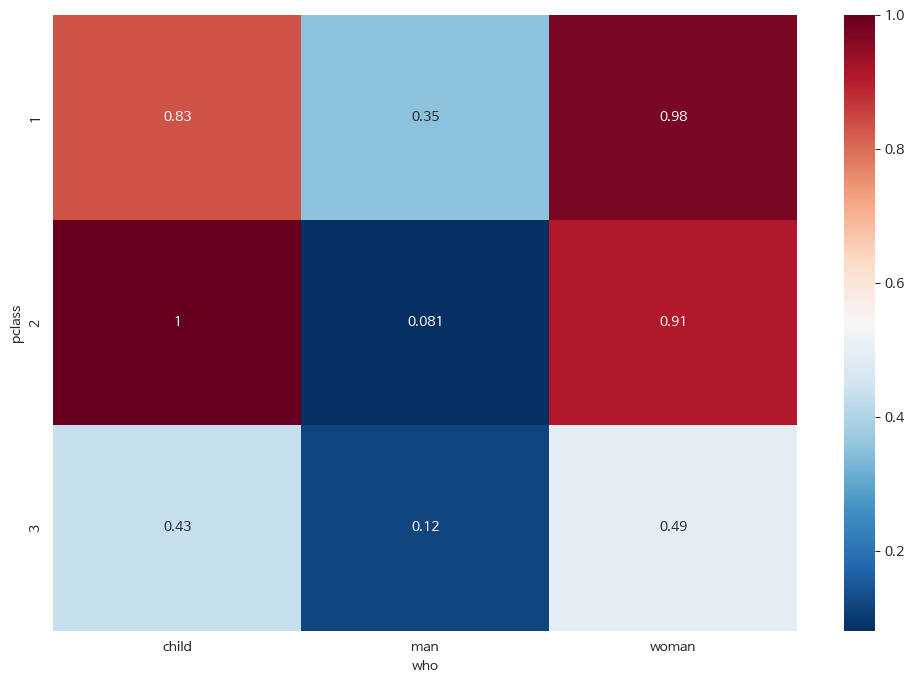

In [15]:
sns.heatmap(a, annot=True, cmap = 'RdBu_r')

## pairplot

[pairplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

pairplot은 그리드(grid) 형태로 각 **집합의 조합에 대해 히스토그램과 분포도**를 그립니다.

또한, 숫자형 column에 대해서만 그려줍니다.

In [16]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 기본 pairplot 생성

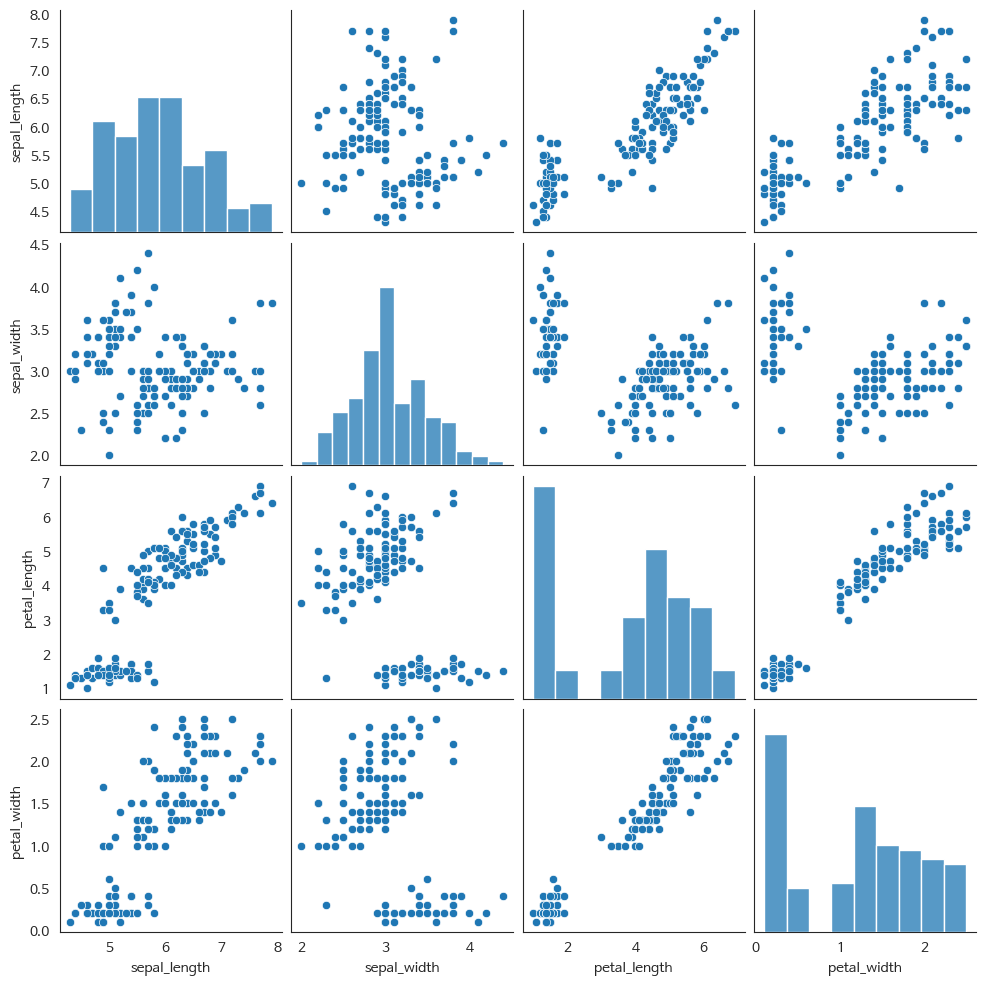

In [17]:
sns.pairplot(iris)
# 같은 컬럼에 대해서는 hist
# 서로 다른 컬럼에 대해서는 scatter

### hue 옵션으로 특성 구분

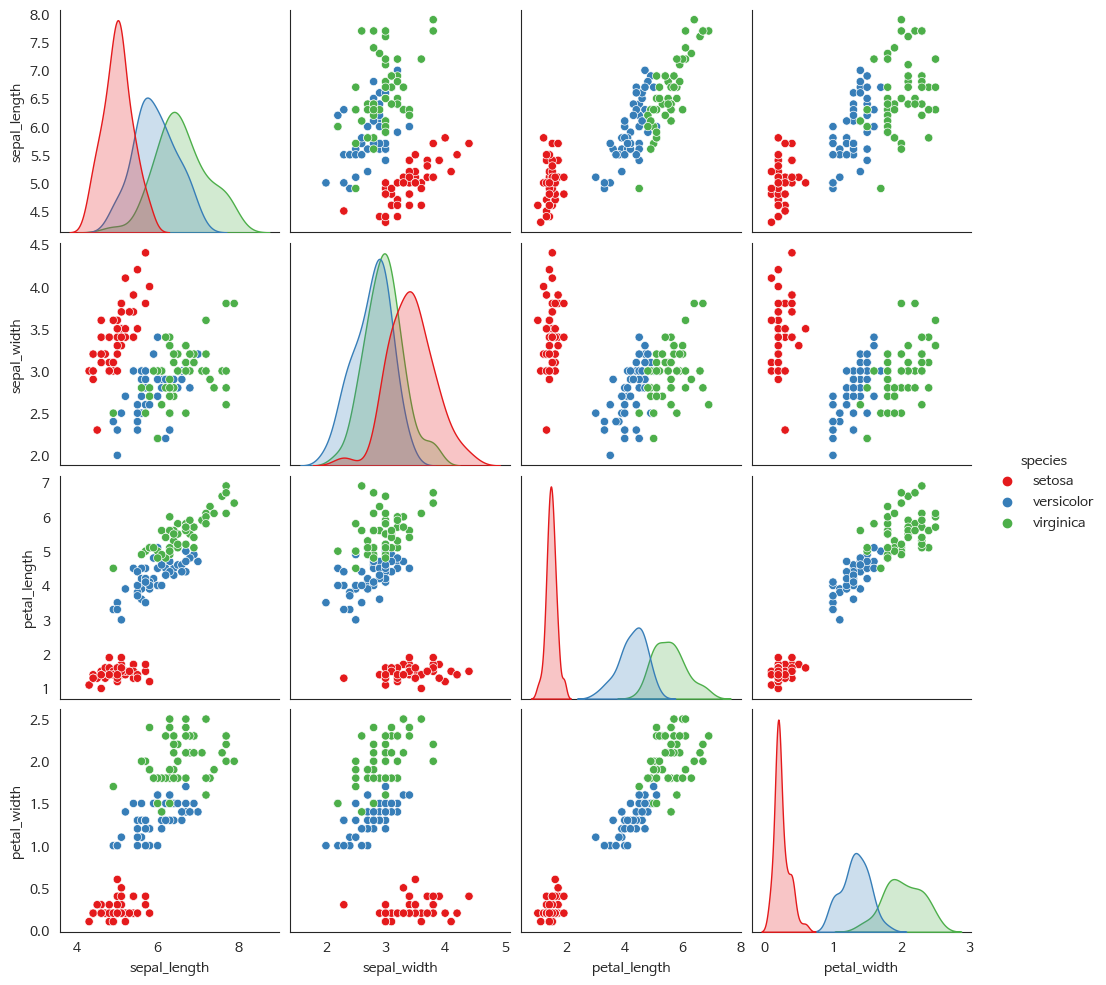

In [18]:
sns.pairplot(iris, hue='species', palette="Set1")
# 꽃의 종류에 따라 다른 색깔로

## violinplot

바이올린처럼 생긴 violinplot 입니다.

column에 대한 **데이터의 비교 분포도**를 확인할 수 있습니다.

* 곡선진 부분 (뚱뚱한 부분)은 데이터의 분포를 나타냅니다.
* 양쪽 끝 뾰족한 부분은 데이터의 최소값과 최대값을 나타냅니다.

[violinplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

### 기본 violinplot 그리기

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='total_bill'>

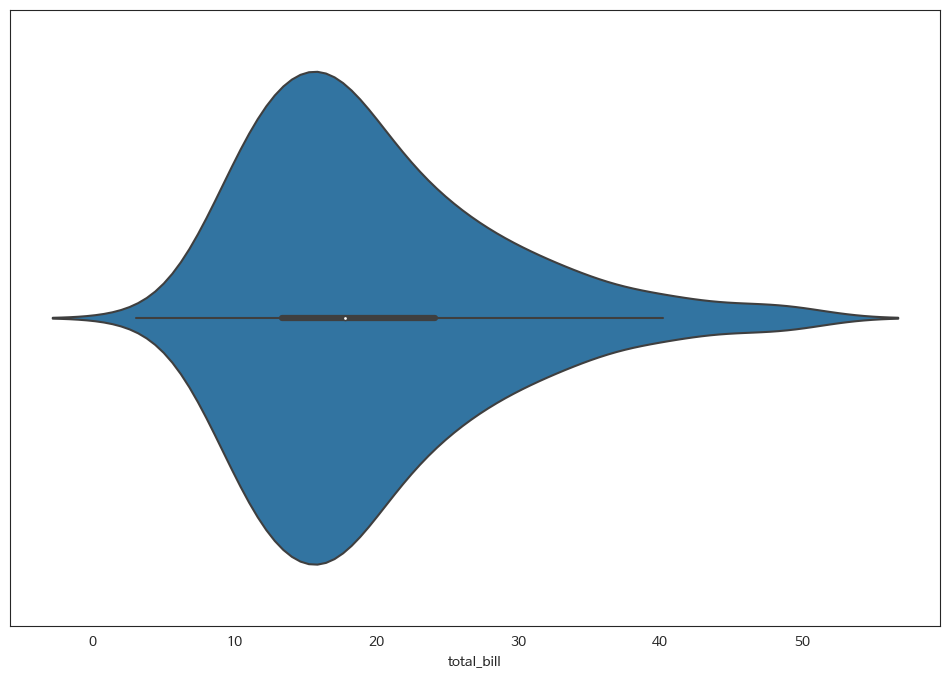

In [19]:
sns.violinplot(x=tips["total_bill"])

### 비교 분포 확인

x, y축을 지정해줌으로썬 바이올린을 분할하여 **비교 분포**를 볼 수 있습니다.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

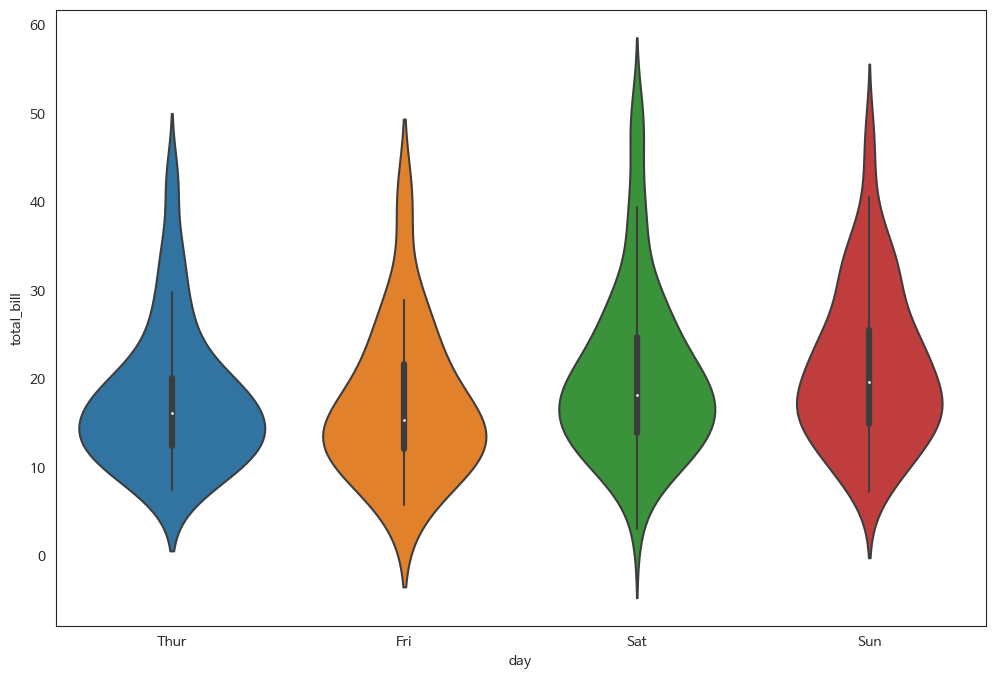

In [21]:
sns.violinplot(x="day", y="total_bill", data=tips)

### hue 옵션으로 분포 비교

사실 hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 비교 분포의 큰 의미는 없습니다.

하지만, hue 옵션을 주면, **단일 column에 대한 바이올린 모양의 비교**를 할 수 있습니다.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

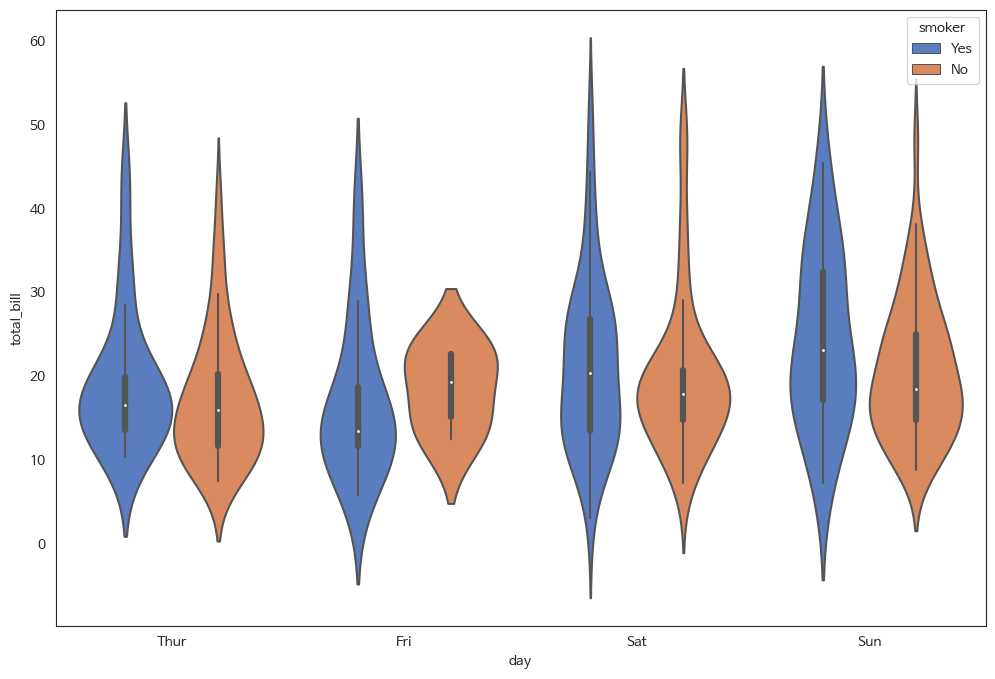

In [22]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

### split 옵션으로 바이올린을 합쳐서 볼 수 있습니다.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

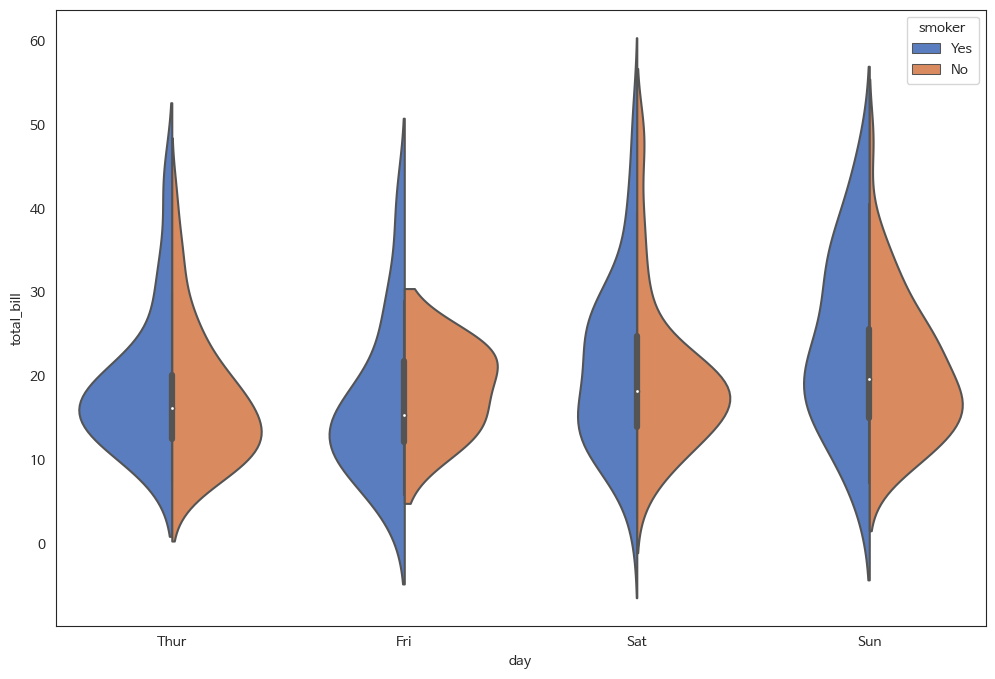

In [23]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)

## lmplot

`lmplot`은 column 간의 **선형관계를 확인하기에 용이한 차트**입니다.

즉, 회귀선을 그려줍니다.

그림자 부분은 앞으로의 데이터가 해당 그림자 영역에 들어올 것을 예측해줍니다.

또한, **outlier**도 같이 짐작해 볼 수 있습니다.

[lmplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

### 기본 lmplot

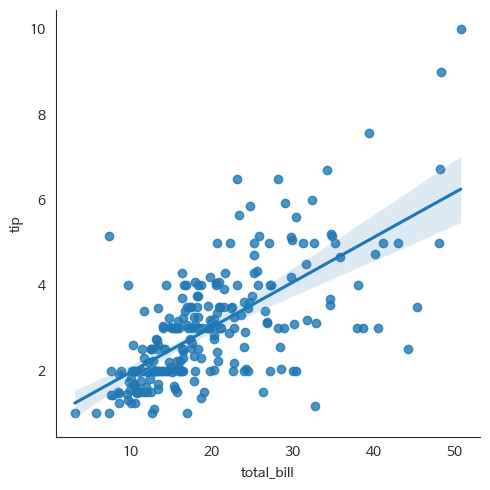

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips)

### hue 옵션으로 다중 선형관계 그리기

아래의 그래프를 통하여 비흡연자가, 흡연자 대비 좀 더 **가파른 선형관계**를 가지는 것을 볼 수 있습니다.

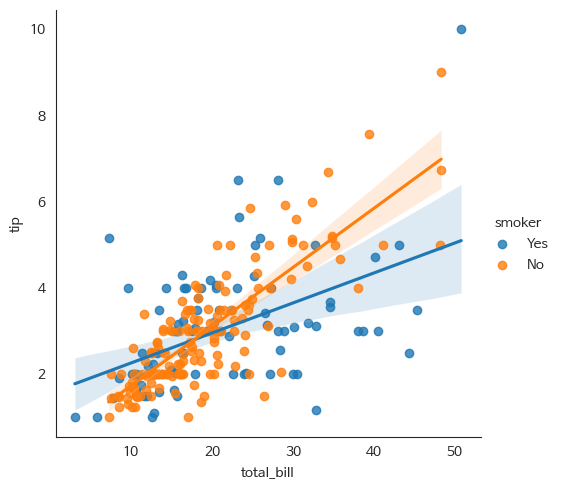

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

### col 옵션을 추가하여 그래프를 별도로 그려볼 수 있습니다

또한, `col_wrap`으로 한 줄에 표기할 column의 갯수를 명시할 수 있습니다.

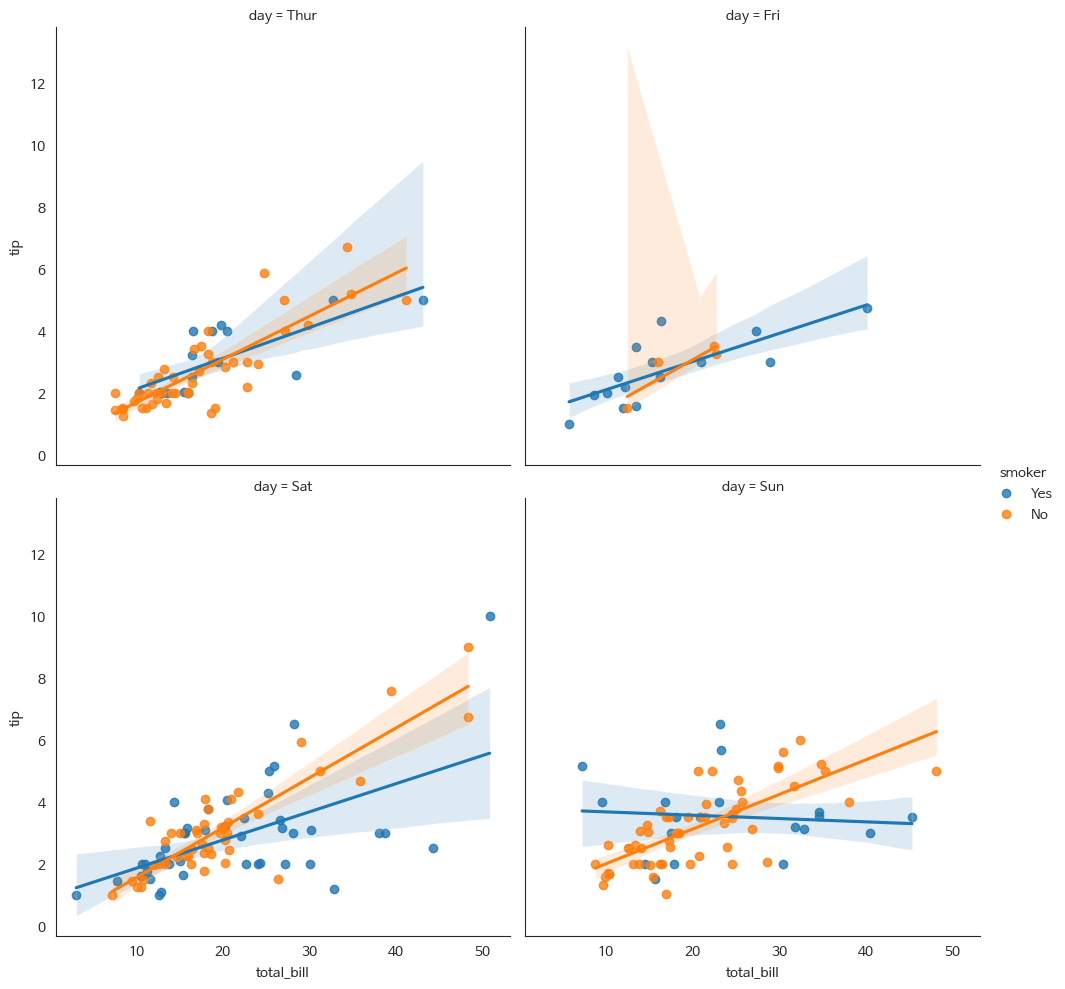

In [26]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, data=tips)
# col= day -> 목, 금, 토, 일별로 양상을 볼 수 있다.
# col_wrap = 2 -> 한 행에 최대 2개까지 그래프를 그리겠다.

## jointplot

scatter(산점도)와 histogram(분포)을 동시에 그려줍니다.

**숫자형 데이터만 표현 가능**하니, 이 점 유의하세요.

[jointplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

### 기본 jointplot 그리기

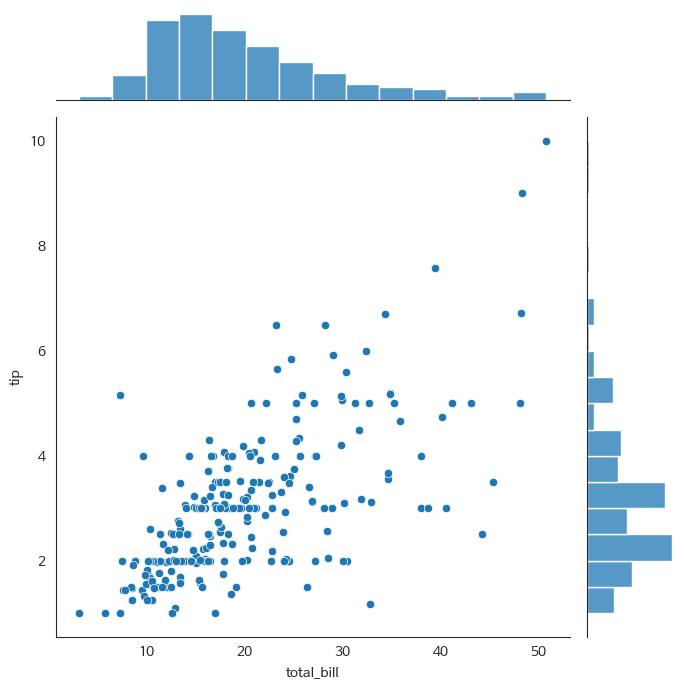

In [27]:
sns.jointplot(x="total_bill", y="tip", height=7, data=tips)

### 선형관계를 표현하는 regression 라인 그리기

옵션에 **kind='reg'**을 추가해 줍니다.

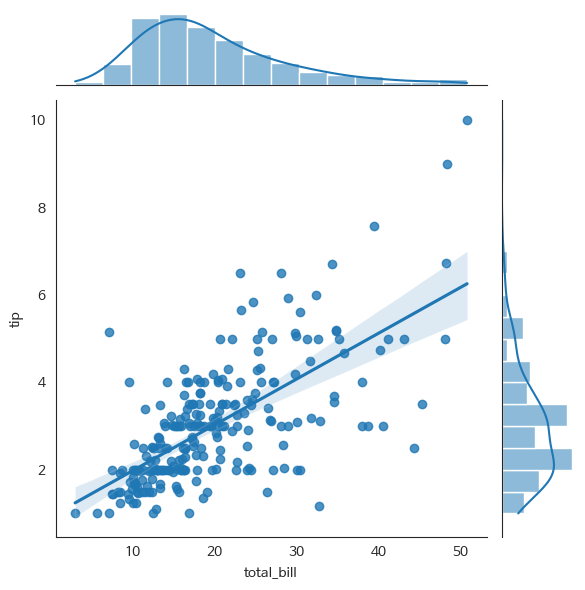

In [28]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg") 
# kind='reg'로 선형회귀 추가! 히스토그램에는 kde추가

### hex 밀도 보기

**kind='hex'** 옵션을 통해 hex 모양의 밀도를 확인할 수 있습니다.

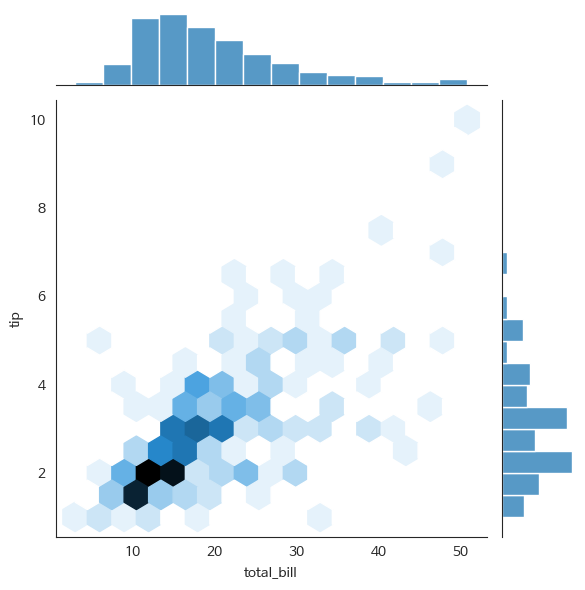

In [29]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") # 벌집모양, 밀집될수록 진하게 표현

## Swarm Plot

<AxesSubplot: xlabel='day', ylabel='total_bill'>

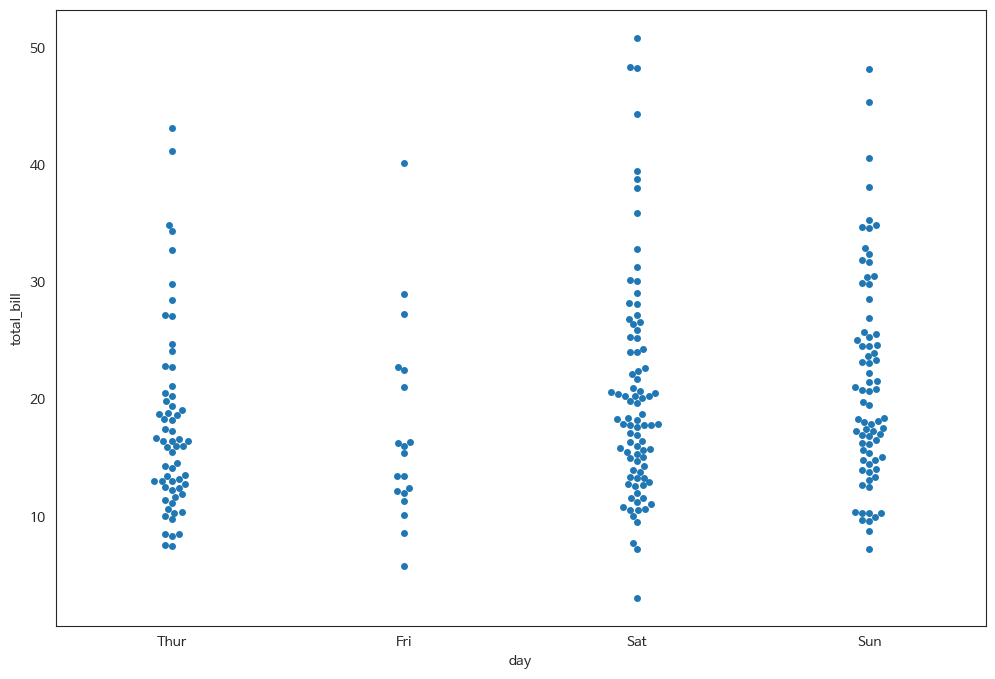

In [30]:
sns.swarmplot(x='day', y='total_bill', data=tips)
# 점들이 겹치지 않게 찍어준다. 데이터가 밀집될수록 가로로 넓어짐

<AxesSubplot: xlabel='day', ylabel='total_bill'>

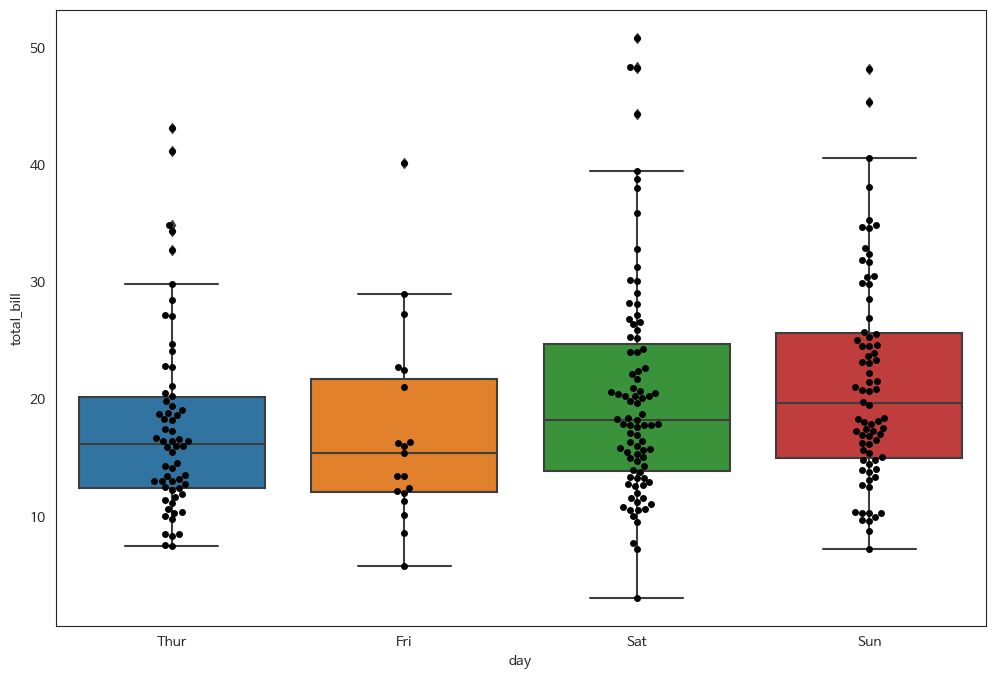

In [31]:
# boxplot과 함께 그리는 경우가 많다
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

## Catplot

카테고리에 따른, row/col으로 분류하여 각각의 그래프를 시각화할 수 있습니다.

[도큐먼트](https://seaborn.pydata.org/generated/seaborn.catplot.html)

- 검은색 bar는 오차막대(error bar) 이며 신뢰구간(confidence interval) 95%

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### barplot

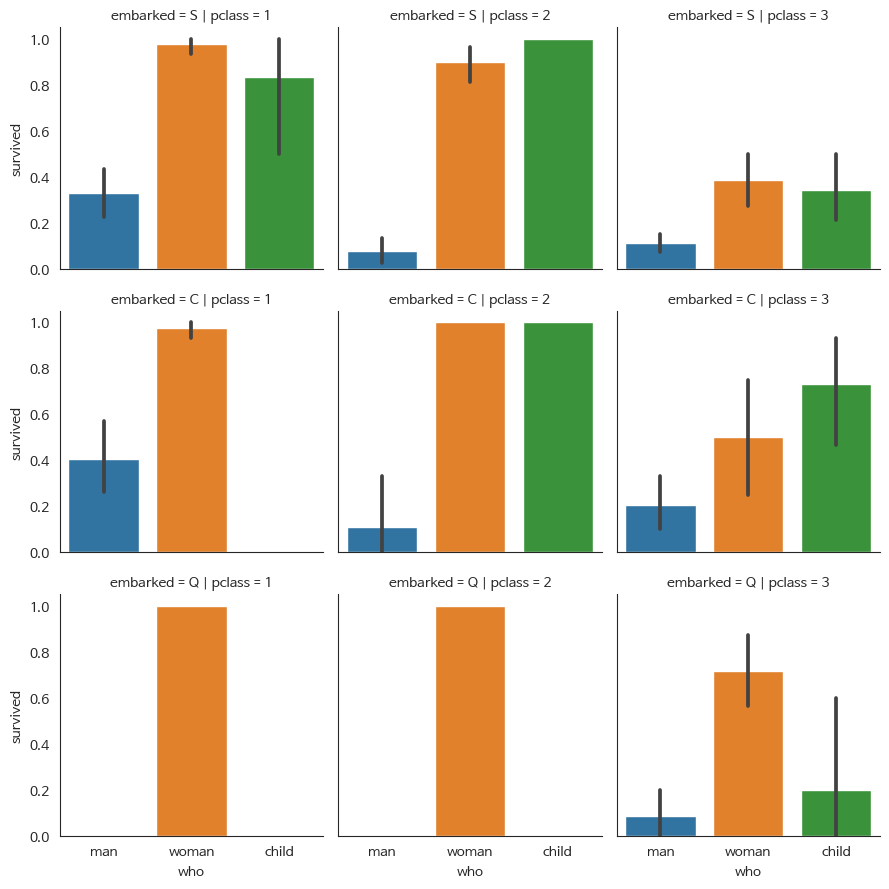

In [33]:
sns.catplot(x='who', y='survived', 
            col='pclass', # pclass 기준 분할
            row='embarked', # 행은 embarked 기준 분할
            kind='bar', # barplot형식으로 출력
            height=3, 
            data=titanic)

# 조건별로 세분화하기 좋다.

### countplot

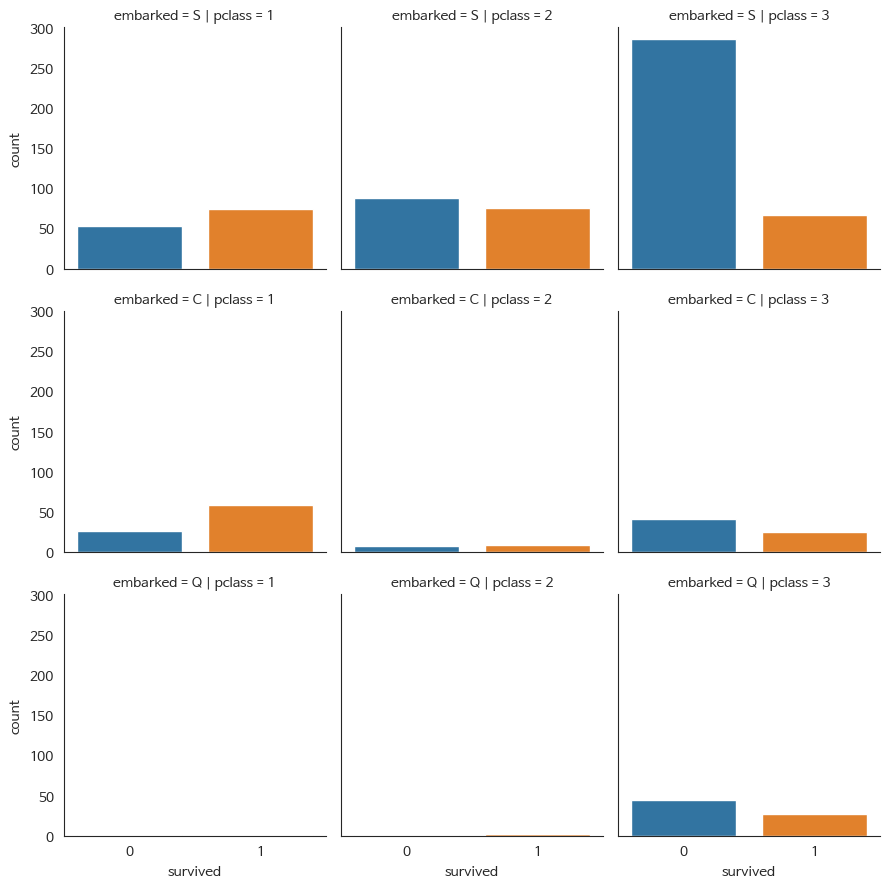

In [34]:
sns.catplot(x='survived', 
            col='pclass', 
            row='embarked',
            kind='count', # countplot으로 변경 (개수세기)
            height=3, 
            data=titanic)

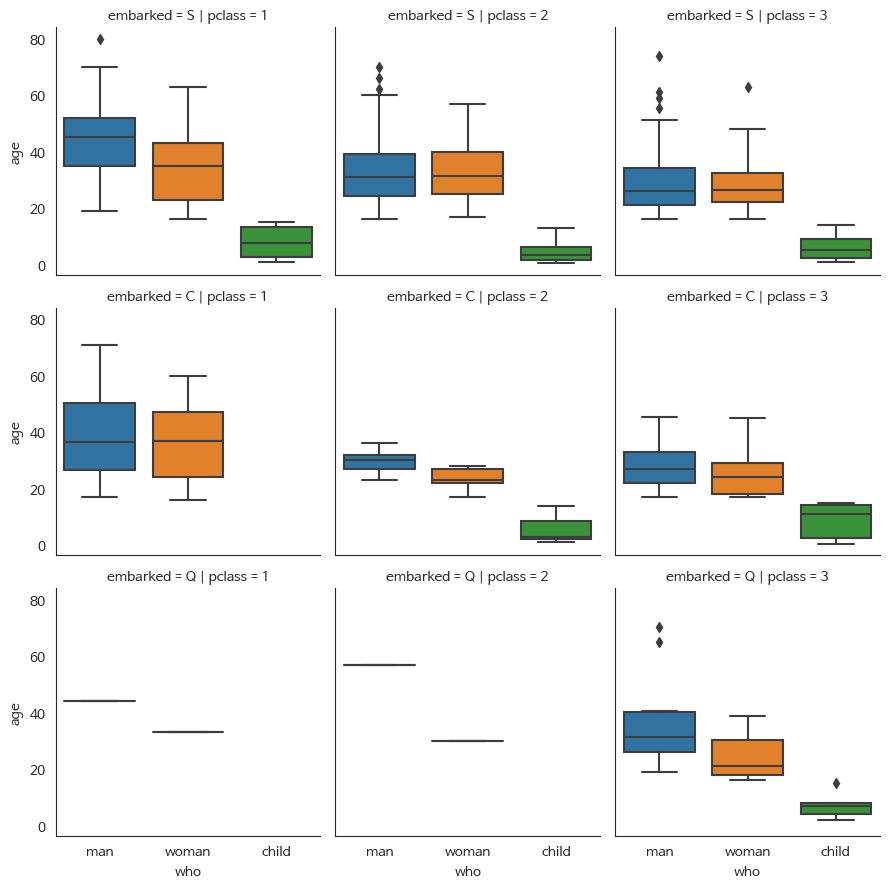

In [35]:
sns.catplot(x='who',
            y='age', 
            col='pclass', 
            row='embarked',
            kind='box', # boxplot
            height=3, 
            data=titanic)

### violinplot

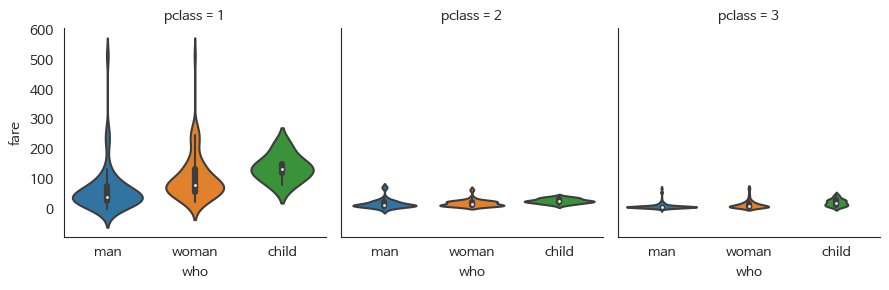

In [36]:
sns.catplot(x='who',
            y='fare', 
            col='pclass', 
            kind='violin', # violinplot
            height=3, 
            data=titanic)

## 제출

제출을 위해 **violinplot**의 **split 옵션으로 바이올린을 합쳐서 볼 수 있습니다**에서 그렸던 그래프와 똑같은 그래프를 다시 그리세요.

- tips 데이터셋 활용
- x축은 `day`, y축은 `total_bill`
- hue는 `smoker`
- palette는 `muted`'
- `split` 옵션을 활성화

In [37]:
tips = sns.load_dataset('tips')

# TODO: "split 옵션으로 바이올린을 합쳐서 볼 수 있습니다"에서 그렸던 그래프를 그리세요.
sns.violinplot(x = 'day', y = 'total_bill', hue = 'smoker', palette = 'muted', split = True. data =tips)

# 이 아래를 수정하면 제대로 채점되지 않습니다.
plt.tight_layout()
plt.savefig('result.png')

SyntaxError: invalid syntax (3534225615.py, line 4)

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [ ]:
import os

os.system('elice_grade result.png cds_ds_exercise.ipynb')